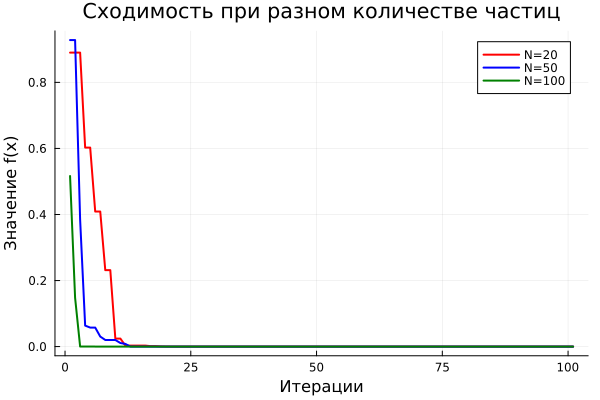

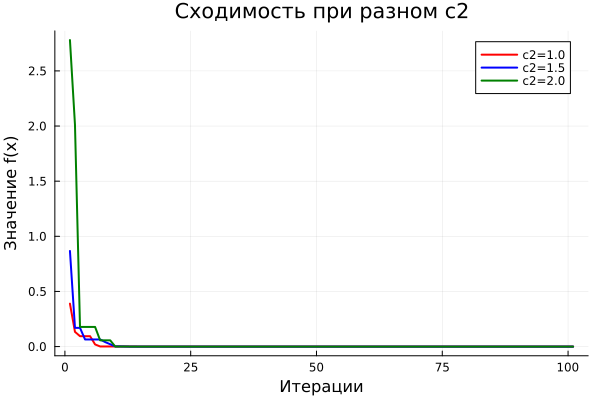

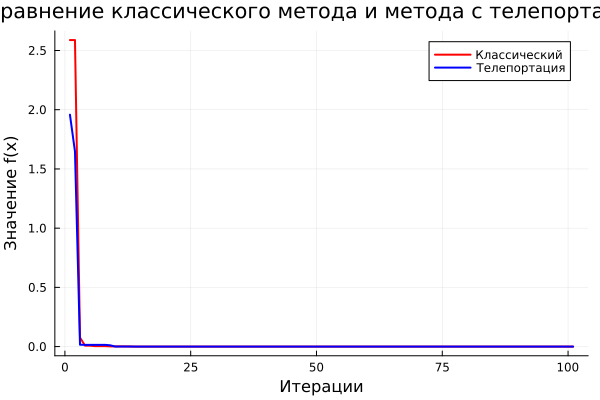

In [ ]:
using Random, Statistics, Printf, Plots

gr()

function rosenbrock(x, y)
    return (1 - x)^2 + 100 * (y - x^2)^2
end

function initialize_particles(num_particles, bounds)
    particles = [[rand(bounds[1]:0.01:bounds[2]), rand(bounds[1]:0.01:bounds[2])] for _ in 1:num_particles]
    velocities = [[rand(bounds[1]:0.01:bounds[2]), rand(bounds[1]:0.01:bounds[2])] for _ in 1:num_particles]
    return particles, velocities
end

function particle_swarm_optimization(num_particles, bounds, w, c1, c2, max_iters, objective_function; teleport=false)
    particles, velocities = initialize_particles(num_particles, bounds)
    personal_best = deepcopy(particles)
    personal_best_values = [objective_function(p[1], p[2]) for p in particles]

    global_best_index = argmin(personal_best_values)
    global_best = personal_best[global_best_index]
    global_best_value = personal_best_values[global_best_index]

    values_history = Float64[]
    push!(values_history, global_best_value)

    prev_best_value = global_best_value
    no_change_iters = 0
    tolerance = 1e-6

    for iter in 1:max_iters
        for i in 1:num_particles
            velocities[i] .= w .* velocities[i] .+
                             c1 .* rand() .* (personal_best[i] .- particles[i]) .+
                             c2 .* rand() .* (global_best .- particles[i])

            particles[i] .= particles[i] .+ velocities[i]
            particles[i] .= clamp.(particles[i], bounds[1], bounds[2])

            value = objective_function(particles[i][1], particles[i][2])
            if value < personal_best_values[i]
                personal_best[i] = copy(particles[i])
                personal_best_values[i] = value
            end

            if value < global_best_value
                global_best = copy(particles[i])
                global_best_value = value
            end
        end

        push!(values_history, global_best_value)

        if teleport && iter % 10 == 0
            for i in 1:num_particles
                if rand() < 0.2
                    particles[i] .= global_best + 0.1 * randn(2)
                end
            end
        end

        if abs(prev_best_value - global_best_value) < tolerance
            no_change_iters += 1
        else
            no_change_iters = 0
        end
        prev_best_value = global_best_value

        # if no_change_iters >= 10
        #     println("Остановлено досрочно на $iter итерации")
        #     break
        # end
    end

    return values_history
end

function plot_convergence_graphs()
    bounds = (-2.0, 2.0)
    max_iters = 100

    values_N20 = particle_swarm_optimization(20, bounds, 0.5, 1.5, 1.5, max_iters, rosenbrock)
    values_N50 = particle_swarm_optimization(50, bounds, 0.5, 1.5, 1.5, max_iters, rosenbrock)
    values_N100 = particle_swarm_optimization(100, bounds, 0.5, 1.5, 1.5, max_iters, rosenbrock)

    plot(1:length(values_N20), values_N20, label="N=20", lw=2, color=:red)
    plot!(1:length(values_N50), values_N50, label="N=50", lw=2, color=:blue)
    plot!(1:length(values_N100), values_N100, label="N=100", lw=2, color=:green)
    xlabel!("Итерации")
    ylabel!("Значение f(x)")
    title!("Сходимость при разном количестве частиц")
    display(current())

    values_c1 = particle_swarm_optimization(50, bounds, 0.5, 1.5, 1.0, max_iters, rosenbrock)
    values_c2 = particle_swarm_optimization(50, bounds, 0.5, 1.5, 1.5, max_iters, rosenbrock)
    values_c3 = particle_swarm_optimization(50, bounds, 0.5, 1.5, 2.0, max_iters, rosenbrock)

    plot(1:length(values_c1), values_c1, label="c2=1.0", lw=2, color=:red)
    plot!(1:length(values_c2), values_c2, label="c2=1.5", lw=2, color=:blue)
    plot!(1:length(values_c3), values_c3, label="c2=2.0", lw=2, color=:green)
    xlabel!("Итерации")
    ylabel!("Значение f(x)")
    title!("Сходимость при разном c2")
    display(current())

    values_standard = particle_swarm_optimization(50, bounds, 0.5, 1.5, 1.5, max_iters, rosenbrock, teleport=false)
    values_teleport = particle_swarm_optimization(50, bounds, 0.5, 1.5, 1.5, max_iters, rosenbrock, teleport=true)

    plot(1:length(values_standard), values_standard, label="Классический", lw=2, color=:red)
    plot!(1:length(values_teleport), values_teleport, label="Телепортация", lw=2, color=:blue)
    xlabel!("Итерации")
    ylabel!("Значение f(x)")
    title!("Сравнение классического метода и метода с телепортацией")
    display(current())
end

plot_convergence_graphs()